In [363]:
import pandas as pd
import os
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
os.chdir("C:/Users/lenovo/Desktop/jupyternotebook")
data = pd.ExcelFile("HW_Data_Set.xlsx")

In [364]:
from pandas import read_excel
# find your sheet name at the bottom left of your excel file and assign 
# it to my_sheet 
my_sheet = 'Sheet1' # change it to your sheet name
file_name = 'HW_Data_Set.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)

In [366]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [367]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [369]:
df.select_dtypes(include='object').columns

Index(['ind_109', 'ind_420', 'ind_422'], dtype='object')

In [370]:
df['ind_109'].unique()

array(['GREEN', 'RED'], dtype=object)

In [371]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['ind_109']= label_encoder.fit_transform(df['ind_109']) 
print(df['ind_109'])

0       0
1       0
2       0
3       0
4       0
       ..
6162    1
6163    1
6164    0
6165    0
6166    0
Name: ind_109, Length: 6167, dtype: int32


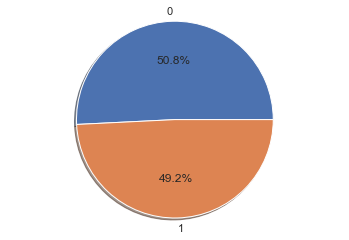

In [372]:
labels = df['ind_109'].astype('category').cat.categories.tolist()
counts = df['ind_109'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [373]:
print(df['ind_420'].value_counts())

?       1041
28        37
45        35
39        33
29        33
        ... 
-303       1
270        1
-308       1
-310       1
-117       1
Name: ind_420, Length: 582, dtype: int64


In [374]:
print(df['ind_422'].value_counts())

?       1041
-211      33
-125      31
-200      30
-212      28
        ... 
-500       1
-496       1
-484       1
-482       1
-509       1
Name: ind_422, Length: 573, dtype: int64


In [375]:
print(df['ind_420'].value_counts().count())

582


In [376]:
print(df['ind_422'].value_counts().count())

573


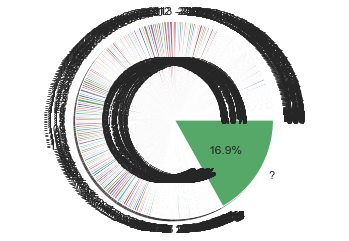

In [377]:
labels = df['ind_422'].astype('category').cat.categories.tolist()
counts = df['ind_422'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

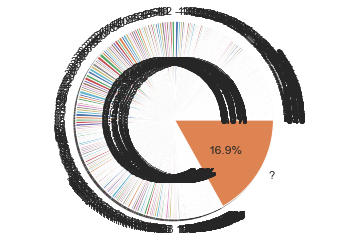

In [378]:
labels = df['ind_420'].astype('category').cat.categories.tolist()
counts = df['ind_420'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [379]:
df = df.replace('?',np.NaN)

In [380]:
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [381]:
df.isnull().values.any()

True

In [148]:
dfbi = df.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['ind_420'])
df_binary = encoder.fit_transform(dfbi)

df_binary.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_420_8,ind_420_9,ind_420_10,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0,0,1,-353.0,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0,1,0,-359.0,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0,1,1,-362.0,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,1,0,0,-367.0,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,1,0,1,-388.0,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [382]:
dfbi.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [254]:
#Hiç bir değişkenin p-value>0.05 değil
for i in range (len(dataorj.columns)):
    if (dataorj.dtypes[i]!=object):   
        stat,p = shapiro(dataorj.iloc[:,i])
        if (p>0.05):
            print ("{} column's P value is: {}".format(dataorj.columns[i],p))

In [383]:
data=df.copy()
del data['20_target']
del data['50_target']
del data['90_target']
del data['ind_422']
del data['ind_420']
del data['90_target']
corr = data.corr()

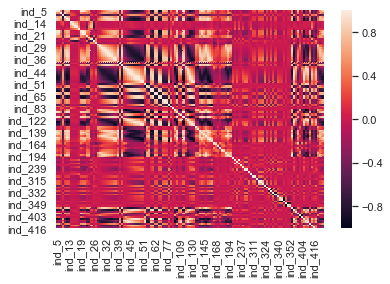

In [384]:
sns.heatmap(corr)

In [385]:
##datadan korelasyonları 0.90 üzeri olan columnları çıkardık features için
corr_matrix = data.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [386]:
X= data.drop(data[to_drop], axis=1)

In [387]:
X

,ind_5,ind_8,ind_9,ind_10,ind_12,ind_14,ind_15,ind_16,ind_18,ind_22,...,ind_349,ind_352,ind_397,ind_399,ind_403,ind_412,ind_416,ind_424,ind_426,ind_428
0,19,100.000000,85.714286,14.285714,72.363515,23.80,17.62,11.73,9.1100,1,...,0.0,0.0,-26.386973,-0.003323,0.045130,0.002371,-49.6,1.000000,0.498547,0.701906
1,24,100.000000,78.571429,21.428571,74.275883,11.45,18.16,12.22,9.2225,1,...,0.0,0.0,-26.085949,-0.000476,0.035314,0.003074,-55.6,1.000000,0.537088,0.690833
2,30,100.000000,71.428571,28.571429,75.140402,8.75,17.86,12.28,9.3125,-1,...,0.0,0.0,-23.250410,-0.000309,0.005860,0.003561,-58.4,1.000000,0.615169,0.693040
3,37,100.000000,64.285714,35.714286,76.677846,7.80,14.76,12.61,9.4150,0,...,0.0,0.0,-19.499975,0.001137,-0.018252,0.004366,-61.8,1.000000,0.661517,0.673418
4,41,100.000000,57.142857,42.857143,81.603007,14.90,11.92,14.25,9.8925,10,...,0.0,0.0,-25.348270,0.001552,-0.007183,0.004198,-79.8,1.000000,0.747204,0.700522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,57.142857,28.571429,28.571429,60.010531,9.70,9.38,13.66,16.2175,-19,...,0.0,0.0,3.500000,0.003911,-0.006418,0.004633,-28.2,0.270270,0.840000,0.600846
6163,22,50.000000,21.428571,28.571429,60.209998,7.65,8.84,11.79,16.1175,-19,...,0.0,0.0,-2.250000,0.002819,-0.009019,0.008511,-28.6,0.000000,0.737470,0.527673
6164,19,42.857143,14.285714,28.571429,64.329611,8.95,9.06,10.30,16.3125,-13,...,0.0,0.0,-4.500000,0.001559,-0.004306,0.008848,-37.2,0.769231,0.632107,0.551759
6165,19,100.000000,7.142857,92.857143,69.027764,13.55,10.36,10.55,16.4200,-5,...,0.0,0.0,-5.850000,-0.000038,0.012664,0.008940,-48.9,1.000000,0.733010,0.591584


In [388]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
k_best = SelectKBest(f_classif, k=5)
k_best.fit_transform(X, y)

array([[-1.34000000e-05,  9.79800280e+01,  9.89055629e+01,
         0.00000000e+00,  0.00000000e+00],
       [-1.34000000e-05,  9.79323188e+01,  9.88596269e+01,
         0.00000000e+00,  0.00000000e+00],
       [-1.34000000e-05,  9.79106643e+01,  9.88399908e+01,
         0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.13000000e-06,  9.87651542e+01,  9.89671474e+01,
         0.00000000e+00,  0.00000000e+00],
       [-8.13000000e-06,  9.86669839e+01,  9.88715018e+01,
         0.00000000e+00,  0.00000000e+00],
       [-8.13000000e-06,  9.87090611e+01,  9.89163928e+01,
         0.00000000e+00,  0.00000000e+00]])

In [389]:
k_best.pvalues_

array([1.10324865e-034, 5.55161137e-006, 3.25204740e-005, 6.86185809e-007,
       1.20251049e-017, 1.00443902e-006, 3.79158615e-012, 1.03300006e-014,
       3.34516744e-025, 3.79754524e-019, 3.94766284e-026, 6.21377544e-013,
       1.61346734e-017, 3.89301269e-011, 5.59308444e-002, 1.74024369e-002,
       1.88932623e-002, 2.22659732e-024, 1.72354093e-009, 4.31643634e-009,
       1.73909157e-008, 7.88525981e-006, 3.16866760e-006, 2.41367247e-004,
       6.60737945e-004, 3.11691780e-014, 6.08451940e-015, 3.59624892e-021,
       1.75961001e-074, 1.34189010e-059, 7.92102294e-016, 2.61054802e-001,
       5.23480379e-006, 9.51673400e-005, 6.02863293e-005, 4.49021942e-010,
       1.72848039e-007, 7.45789765e-005, 4.42317398e-010, 5.02436078e-004,
       2.30124112e-003, 7.42442043e-003, 3.67381417e-003, 1.33245043e-005,
       8.87058493e-055, 1.28327193e-016, 2.26583166e-029, 3.08654186e-027,
       2.29122220e-014, 1.38209232e-158, 1.46304792e-056, 1.67133810e-102,
       2.31230870e-014, 9

In [390]:
p_values = pd.DataFrame({'column': X.columns, 'p_value':k_best.pvalues_}).sort_values('p_value')

In [391]:
p_values.head()


,column,p_value
65,ind_352,0.000000e+00
64,ind_349,0.000000e+00
49,ind_309,1.382092e-158
53,ind_316,9.292627e-123
51,ind_311,1.671338e-102


In [392]:
 p_values[p_values['p_value'] >= 0.05]

,column,p_value
14,ind_28,0.055931
71,ind_424,0.092514
31,ind_109,0.261055


In [393]:
del X['ind_28']
del X['ind_424']
del X['ind_109']

In [394]:
y=df['90_target']

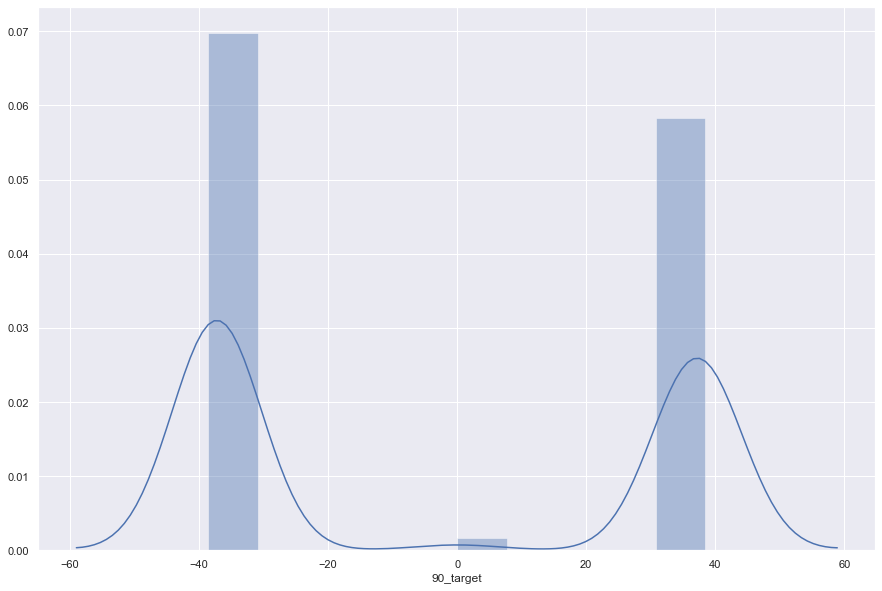

In [457]:
plt.figure(figsize=(15,10))
sns.distplot(df["90_target"], hist=True, color="b")

In [395]:
##target ve diğer değişkenler arasında korelansyonu sıralaması
corr1 = pd.concat([y, data], axis=1, keys=['y', 'data']).corr().loc['data', 'y']
c1 = corr1.abs().unstack()
c1.sort_values(ascending = False)

90_target  ind_18     0.140877
           ind_17     0.129277
           ind_412    0.124265
           ind_332    0.115002
           ind_16     0.108077
                        ...   
           ind_168    0.001107
           ind_404    0.001059
           ind_403    0.001059
           ind_88     0.000599
           ind_188    0.000393
Length: 131, dtype: float64

In [396]:
##target ve diğer değişkenler arasında korelansyonu en yüksek olanlar(131 column)
c1.sort_values(ascending=True, inplace=True)
columns_above_1 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.1 and col1 != col2]

In [397]:
columns_above_1

[('90_target', 'ind_324'),
 ('90_target', 'ind_16'),
 ('90_target', 'ind_332'),
 ('90_target', 'ind_412'),
 ('90_target', 'ind_17'),
 ('90_target', 'ind_18')]

In [398]:
##target ve features arasında korelansyonu sıralaması(74 column)
corr2 = pd.concat([y, X], axis=1, keys=['y', 'X']).corr().loc['X', 'y']
c2 = corr2.abs().unstack()
c2.sort_values(ascending = False)

90_target  ind_18     0.140877
           ind_412    0.124265
           ind_332    0.115002
           ind_16     0.108077
           ind_324    0.103707
                        ...   
           ind_134    0.001875
           ind_168    0.001107
           ind_403    0.001059
           ind_88     0.000599
           ind_188    0.000393
Length: 71, dtype: float64

In [399]:
##target ve features arasında korelansyonu en yüksek olanlar(74 column)
c2.sort_values(ascending=True, inplace=True)
columns_above_2 = [(col1, col2) for col1, col2 in c1.index if c1[col1,col2] > 0.1 and col1 != col2]

In [400]:
columns_above_2 

[('90_target', 'ind_324'),
 ('90_target', 'ind_16'),
 ('90_target', 'ind_332'),
 ('90_target', 'ind_412'),
 ('90_target', 'ind_17'),
 ('90_target', 'ind_18')]

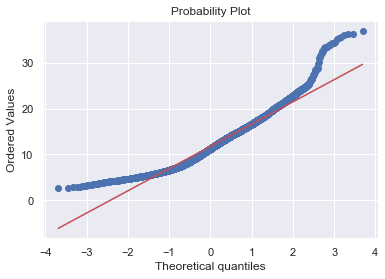

In [401]:
import scipy.stats as stats
import pylab
stats.probplot(df["ind_16"], dist ="norm", plot = pylab)
pylab.show()

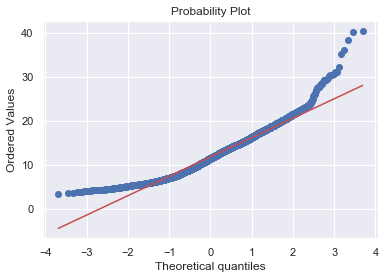

In [402]:
import scipy.stats as stats
import pylab
stats.probplot(df["ind_17"], dist ="norm", plot = pylab)
pylab.show()

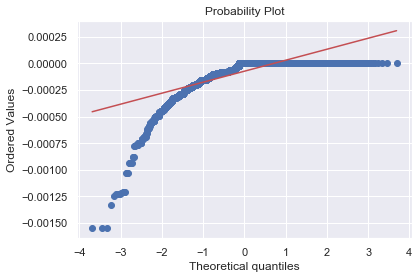

In [403]:
import scipy.stats as stats
import pylab
stats.probplot(df["ind_324"], dist ="norm", plot = pylab)
pylab.show()

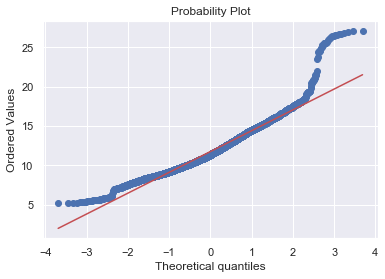

In [404]:
import scipy.stats as stats
import pylab
stats.probplot(df["ind_18"], dist ="norm", plot = pylab)
pylab.show()

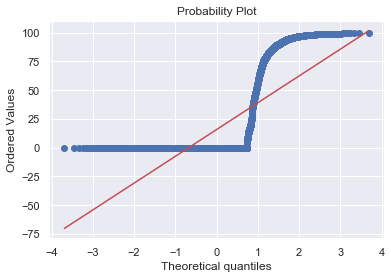

In [405]:
import scipy.stats as stats
import pylab
stats.probplot(df["ind_332"], dist ="norm", plot = pylab)
pylab.show()

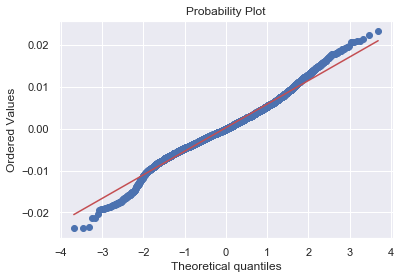

In [406]:
import scipy.stats as stats
import pylab
stats.probplot(df["ind_412"], dist ="norm", plot = pylab)
pylab.show()

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [408]:
from sklearn.linear_model import LinearRegression
regresyon = LinearRegression()

In [409]:
regresyon.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [410]:
regresyon.coef_  ##her bir features için m değeri

array([ 8.35883954e-01, -3.45984810e+08,  3.45984810e+08,  3.45984810e+08,
        5.60962402e-02,  4.91642565e-02, -2.67808062e-01,  7.80194871e-01,
        1.55811597e+00, -3.00540417e-01, -2.53768608e-01, -1.18449864e+06,
       -1.18264732e+06,  2.36627108e+06, -1.89837515e-02,  2.02207267e-03,
        3.11803222e-02, -1.71068162e-02, -1.17532238e+00,  1.32642232e-01,
        3.11990837e-01, -3.99346501e-02, -2.74996096e-01,  8.30653794e-02,
        1.64137334e+00, -1.87453009e-01,  1.94466881e-01,  7.37635695e+00,
        1.44396521e-01,  6.16760749e+02, -5.95196545e-01,  1.65611152e-02,
        1.65228017e-01, -3.33259143e-01,  2.75228789e-01, -6.53114170e-03,
        2.68734396e-02,  3.55441173e-01, -2.76903924e-01, -1.66393667e-02,
       -1.11801922e-02,  9.43715955e-01, -9.46565723e+01, -1.07089221e+01,
        2.15054750e-02,  1.77711544e+04,  2.99504623e-02,  1.22321306e+04,
       -1.87294238e-02, -6.42370433e-03, -2.47260263e+00,  6.10220730e-02,
       -4.32792902e-02, -

In [411]:
regresyon.intercept_  #b

-4.401718074056573

In [412]:
regresyon.score(X,y) 
##x ve y leri tahmin ettiğinde modelin ne kadar doğru olduğunu belirtiyor en yuksek olanı secmeliyiz (r square)

0.09528056286177489

In [413]:
regresyon.predict(X)[0:10] 
#ilk 10 model için prediction gercekleştir modelin içine keni xlerimi koyarak yleri bul tahmin edilmiş y değerleri

array([-1.68594209, -1.86557201, -6.97817957, -4.7076194 , -5.49935036,
       -7.69223416, -5.51752865, -5.53936775, -2.54657525, -5.11914839])

In [414]:
modelstat = lm.fit()
modelstat.summary()
modelstat.fittedvalues[0:5] ##yukarıdakiyle aynı çıktı  mı?

0   -0.814197
1   -0.303884
2   -3.532784
3   -2.453176
4   -5.664003
dtype: float64

In [415]:
##modelin sonuçları minsuare error
from sklearn.metrics import mean_squared_error, r2_score
lm = smf.ols("y ~ X", df)
model = lm.fit()
model.summary()
mse = mean_squared_error(y, model.fittedvalues)

In [416]:
mse ##tahmin hatası

1223.5708208187082

In [417]:
import numpy as np
rmse = np.sqrt(mse)
rmse

34.97957719611128

In [418]:
regresyon.predict(X)[0:10]

array([-1.68594209, -1.86557201, -6.97817957, -4.7076194 , -5.49935036,
       -7.69223416, -5.51752865, -5.53936775, -2.54657525, -5.11914839])

In [419]:
k_t= pd.DataFrame({"gercek_y": y[0:10], "tahmin_y": reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,36.997753,-0.814214
1,37.016198,-0.303906
2,-37.024805,-3.532814
3,-37.040483,-2.453209
4,-37.103503,-5.664025
5,-37.098277,-9.046497
6,-37.096740,-7.922687
7,-37.088440,-7.954316
8,-37.069073,-4.064616
9,-37.074913,-6.985398


In [420]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"] ## gercek y ve tahmin y arasındaki hata
k_t

,gercek_y,tahmin_y,hata
0,36.997753,-0.814214,37.811966
1,37.016198,-0.303906,37.320104
2,-37.024805,-3.532814,-33.491991
3,-37.040483,-2.453209,-34.587275
4,-37.103503,-5.664025,-31.439478
5,-37.098277,-9.046497,-28.051780
6,-37.096740,-7.922687,-29.174053
7,-37.088440,-7.954316,-29.134123
8,-37.069073,-4.064616,-33.004456
9,-37.074913,-6.985398,-30.089515


In [421]:
k_t["hata_kare"] = k_t["hata"]**2 ##hataların kareleri (pozitif etkisini görmek için yaoıyoruz) her bir noktayı tahmin eder
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,36.997753,-0.814214,37.811966,1429.744797
1,37.016198,-0.303906,37.320104,1392.790144
2,-37.024805,-3.532814,-33.491991,1121.713475
3,-37.040483,-2.453209,-34.587275,1196.279563
4,-37.103503,-5.664025,-31.439478,988.440774
5,-37.098277,-9.046497,-28.051780,786.902337
6,-37.096740,-7.922687,-29.174053,851.125355
7,-37.088440,-7.954316,-29.134123,848.797133
8,-37.069073,-4.064616,-33.004456,1089.294148
9,-37.074913,-6.985398,-30.089515,905.378920


In [422]:
np.sum(k_t["hata_kare"])

10610.46664519369

In [423]:
np.mean(k_t["hata_kare"])

1061.046664519369

In [424]:
##hata kaerler ortalamasını OLSden aldık. MSE çıktı yani buradan
rmse

34.97957719611128

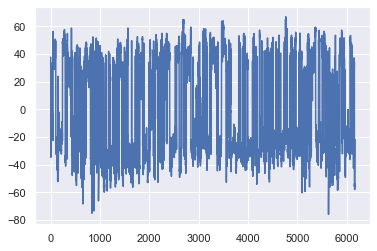

In [425]:
plt.plot(model.resid)

In [426]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [427]:
score

0.07407531346002294

In [428]:
model.predict(X)[0:10] 


0   -0.814197
1   -0.303884
2   -3.532784
3   -2.453176
4   -5.664003
5   -9.046484
6   -7.922676
7   -7.954351
8   -4.064638
9   -6.985420
dtype: float64

In [429]:
modelstat = lm.fit()
modelstat.summary()
modelstat.fittedvalues[0:5]

0   -0.814197
1   -0.303884
2   -3.532784
3   -2.453176
4   -5.664003
dtype: float64

In [430]:
model.fittedvalues[0:5]  ##fitted y

0   -0.814197
1   -0.303884
2   -3.532784
3   -2.453176
4   -5.664003
dtype: float64

In [431]:
y[0:5] ##gercek y

0    36.997753
1    37.016198
2   -37.024805
3   -37.040483
4   -37.103503
Name: 90_target, dtype: float64

In [432]:
regresyon.score(X,y) 
##x ve y leri tahmin ettiğinde modelin ne kadar doğru olduğunu belirtiyor en yuksek olanı secmeliyiz (r square)

0.09528056286177489

In [433]:
import statsmodels.api as sm
lm = sm.OLS(y, X)
model = lm.fit()  ##lm diye fonksiyon yaratıp fit ile model kurulumunu gerçekleştirdik
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.095
Method:                 Least Squares   F-statistic:                              10.14
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                   4.41e-101
Time:                        17:50:14   Log-Likelihood:                         -30673.
No. Observations:                6167   AIC:                                  6.149e+04
Df Residuals:                    6096   BIC:                                  6.197e+04
Df Model:                          71                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          0.8572      0.287      2.989      0.003       0.295       1.419
ind_8      -2.951e+08   1.27e+08     -2.328      0.020   -5.44e+08   -4.66e+07
ind_9       2.951e+08   1.27e+08      2.328      0.020    4.66e+07    5.44e+08
ind_10      2.951e+08   1.27e+08      2.328      0.020    4.66e+07    5.44e+08
ind_12        -0.1111      0.207     -0.537      0.591      -0.517       0.295
ind_14         0.0258      0.149      0.173      0.863      -0.266       0.318
ind_15        -0.1637      0.229     -0.715      0.475      -0.613       0.285
ind_16         0.8213      0.249      3.295      0.001       0.333       1.310
ind_18         1.5648      0.234      6.680      0.000       1.106       2.024
ind_22        -0.3567      0.197     -1.815      0.070      -0.742       0.029
ind_23        -0.3540      0.198     -1.788      0.074      -0.742       0.034
ind_25      -7.26e+05   9.73e+05     -0.746      0.456   -2.63e+06    1.18e+06
ind_26     -7.245e+05   9.73e+05     -0.745      0.457   -2.63e+06    1.18e+06
ind_27      1.448e+06   1.95e+06      0.744      0.457   -2.37e+06    5.26e+06
ind_29        -0.0206      0.014     -1.428      0.153      -0.049       0.008
ind_30        -0.0076      0.014     -0.534      0.593      -0.035       0.020
ind_36         0.0406      0.010      4.025      0.000       0.021       0.060
ind_39         0.0010      0.044      0.022      0.982      -0.085       0.087
ind_40        -1.8522      0.874     -2.120      0.034      -3.565      -0.140
ind_42         0.1999      0.286      0.699      0.484      -0.360       0.760
ind_43         0.2767      0.226      1.226      0.220      -0.166       0.719
ind_44         0.0775      0.178      0.435      0.664      -0.272       0.427
ind_52        -0.4051      0.280     -1.449      0.147      -0.953       0.143
ind_56         0.0871      0.100      0.875      0.382      -0.108       0.282
ind_58         1.2410      1.076      1.153      0.249      -0.868       3.350
ind_62        -0.2991      0.083     -3.613      0.000      -0.461      -0.137
ind_71         0.1896      0.076      2.506      0.012       0.041       0.338
ind_82         6.9841      0.990      7.056      0.000       5.044       8.924
ind_83         0.1237      0.065      1.906      0.057      -0.003       0.251
ind_88       378.6549   1125.741      0.336      0.737   -1828.195    2585.505
ind_116       -0.6573      0.342     -1.923      0.055      -1.327       0.013
ind_134        0.0362      0.127      0.285      0.776      -0.213       0.285
ind_147        0.1261      0.162      0.779      0.436      -0.191       0.443
ind_164       -0.4514      0.169     -2.674      0.008      -0.782      -0.120
ind_168        0.2265      0.092      2.475      0.013       

In [434]:
# resid lere geliyoruz
# nasıl bir error dağılımı var hesaplamamız lazım

In [435]:
import statsmodels.formula.api as smf
lm = smf.ols("y ~ X", df)## bana y'yi X ile açıkla diğer değişkenleri de bunun yanına getirirken artı ile ekle ya da tvnin 2 katıyla açıkla vb.
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     9.367
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.91e-91
Time:                        17:50:15   Log-Likelihood:                -30673.
No. Observations:                6167   AIC:                         6.149e+04
Df Residuals:                    6095   BIC:                         6.197e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4412     11.834      0.037      0.970     -22.758      23.641
X[0]           0.8593      0.292      2.939      0.003       0.286       1.432
X[1]       -2.951e+08   1.27e+08     -2.328      0.020   -5.44e+08   -4.66e+07
X[2]        2.951e+08   1.27e+08      2.328      0.020    4.66e+07    5.44e+08
X[3]        2.951e+08   1.27e+08      2.328      0.020    4.66e+07    5.44e+08
X[4]          -0.1172      0.264     -0.444      0.657      -0.634       0.400
X[5]           0.0256      0.149      0.172      0.864      -0.267       0.318
X[6]          -0.1635      0.229     -0.713      0.476      -0.613       0.286
X[7]           0.8211      0.249      3.294      0.001       0.332       1.310
X[8]           1.5630      0.240      6.521      0.000       1.093       2.033
X[9]          -0.3582      0.201     -1.782      0.075      -0.752       0.036
X[10]         -0.3556      0.203     -1.754      0.080      -0.753       0.042
X[11]      -7.259e+05   9.73e+05     -0.746      0.456   -2.63e+06    1.18e+06
X[12]      -7.245e+05   9.73e+05     -0.744      0.457   -2.63e+06    1.18e+06
X[13]       1.448e+06   1.95e+06      0.744      0.457   -2.37e+06    5.26e+06
X[14]         -0.0206      0.014     -1.428      0.153      -0.049       0.008
X[15]         -0.0074      0.015     -0.508      0.612      -0.036       0.021
X[16]          0.0408      0.011      3.768      0.000       0.020       0.062
X[17]          0.0017      0.048      0.035      0.972      -0.092       0.095
X[18]         -1.8621      0.914     -2.038      0.042      -3.653      -0.071
X[19]          0.1978      0.291      0.679      0.497      -0.373       0.769
X[20]          0.2759      0.227      1.215      0.224      -0.169       0.721
X[21]          0.0773      0.178      0.433      0.665      -0.273       0.427
X[22]         -0.4057      0.280     -1.449      0.147      -0.955       0.143
X[23]          0.0869      0.100      0.870      0.384      -0.109       0.283
X[24]          1.2369      1.082      1.143      0.253      -0.884       3.357
X[25]         -0.2989      0.083     -3.606      0.000      -0.461      -0.136
X[26]          0.1897      0.076      2.505      0.012       0.041       0.338
X[27]          6.9821      0.991      7.044      0.000       5.039       8.925
X[28]          0.1236      0.065      1.902      0.057      -0.004       0.251
X[29]        380.5431   1126.970      0.338      0.736   -1828.717    2589.803
X[30]         -0.6584      0.343     -1.920      0.055      -1.331       0.014
X[31]          0.0359      0.127      0.282      0.778      -0.214       0.285
X[32]          0.1266      0.162      0.779      0.436      -0.192       0.445
X[33]         -0.4524      0.171     -2.649      0.008      -0.787      -0.118
X[34]          0.2267      0.092      2.472      0.013       0.047       0.406
X[

In [436]:
influence = model.get_influence()
influence

In [437]:
resid_student = influence.resid_studentized_external

Leverage vs studentized residuals


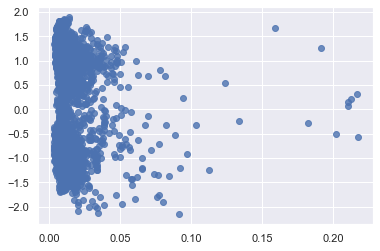

In [438]:
(cooks, p) =influence.cooks_distance
(dffits,p) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs studentized residuals")
sns.regplot(leverage , model.resid_pearson , fit_reg = False)

# olması gerekenle kendi hatalarımzla karşılaştırıyoruz

In [439]:
# errorlar normal dağılacak
# uzak noktalar erors outliers
# errorlarım normal dağılımdan geliyor mu diye test yapalım şimdide

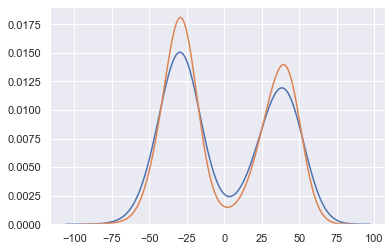

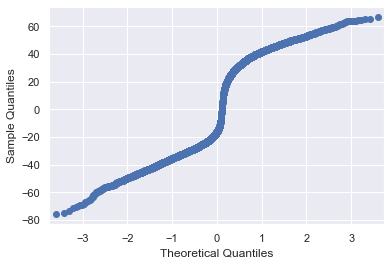

In [441]:
hwres = pd.concat([df , pd.Series(model.resid, name = 'resid'), pd.Series(model.predict(), name = "predict")], axis = 1)

sns.kdeplot(np.array(hwres.resid), bw=10)
sns.distplot(np.array(hwres.resid), hist=False)

sm.qqplot(hwres.resid)
plt.show()

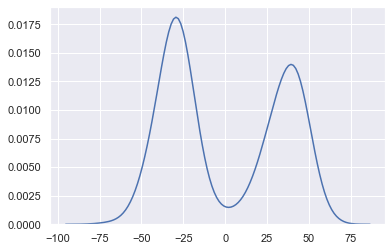

In [443]:
sns.distplot(np.array(hwres.resid), hist=False)

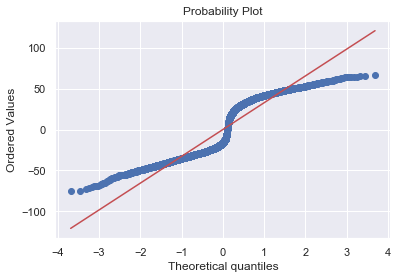

In [444]:
import pylab
stats.probplot(hwres.resid, dist="norm", plot=pylab)
pylab.show()

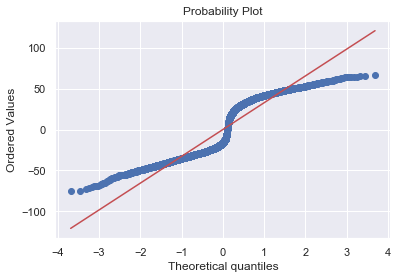

Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [446]:
# benim hatalarım normal dağılımdan geliyor mu gelmiyor mu ? 
import pylab
stats.probplot(hwres.resid, dist="norm", plot=pylab)
pylab.show()
from scipy.stats import shapiro

stat, p =shapiro(hwres.resid)
alpha = 0.05
if p > alpha:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Hatalar Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')
    

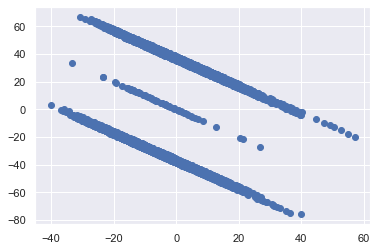

In [447]:
resid = model.resid
plt.scatter(model.predict(), resid)

In [448]:
# içerideki x lerin arasındaki korelasyonu test etmek için vıf var
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm = smf.ols("y ~ X" , df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     9.367
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.91e-91
Time:                        17:58:55   Log-Likelihood:                -30673.
No. Observations:                6167   AIC:                         6.149e+04
Df Residuals:                    6095   BIC:                         6.197e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4412     11.834      0.037      0.970     -22.758      23.641
X[0]           0.8593      0.292      2.939      0.003       0.286       1.432
X[1]       -2.951e+08   1.27e+08     -2.328      0.020   -5.44e+08   -4.66e+07
X[2]        2.951e+08   1.27e+08      2.328      0.020    4.66e+07    5.44e+08
X[3]        2.951e+08   1.27e+08      2.328      0.020    4.66e+07    5.44e+08
X[4]          -0.1172      0.264     -0.444      0.657      -0.634       0.400
X[5]           0.0256      0.149      0.172      0.864      -0.267       0.318
X[6]          -0.1635      0.229     -0.713      0.476      -0.613       0.286
X[7]           0.8211      0.249      3.294      0.001       0.332       1.310
X[8]           1.5630      0.240      6.521      0.000       1.093       2.033
X[9]          -0.3582      0.201     -1.782      0.075      -0.752       0.036
X[10]         -0.3556      0.203     -1.754      0.080      -0.753       0.042
X[11]      -7.259e+05   9.73e+05     -0.746      0.456   -2.63e+06    1.18e+06
X[12]      -7.245e+05   9.73e+05     -0.744      0.457   -2.63e+06    1.18e+06
X[13]       1.448e+06   1.95e+06      0.744      0.457   -2.37e+06    5.26e+06
X[14]         -0.0206      0.014     -1.428      0.153      -0.049       0.008
X[15]         -0.0074      0.015     -0.508      0.612      -0.036       0.021
X[16]          0.0408      0.011      3.768      0.000       0.020       0.062
X[17]          0.0017      0.048      0.035      0.972      -0.092       0.095
X[18]         -1.8621      0.914     -2.038      0.042      -3.653      -0.071
X[19]          0.1978      0.291      0.679      0.497      -0.373       0.769
X[20]          0.2759      0.227      1.215      0.224      -0.169       0.721
X[21]          0.0773      0.178      0.433      0.665      -0.273       0.427
X[22]         -0.4057      0.280     -1.449      0.147      -0.955       0.143
X[23]          0.0869      0.100      0.870      0.384      -0.109       0.283
X[24]          1.2369      1.082      1.143      0.253      -0.884       3.357
X[25]         -0.2989      0.083     -3.606      0.000      -0.461      -0.136
X[26]          0.1897      0.076      2.505      0.012       0.041       0.338
X[27]          6.9821      0.991      7.044      0.000       5.039       8.925
X[28]          0.1236      0.065      1.902      0.057      -0.004       0.251
X[29]        380.5431   1126.970      0.338      0.736   -1828.717    2589.803
X[30]         -0.6584      0.343     -1.920      0.055      -1.331       0.014
X[31]          0.0359      0.127      0.282      0.778      -0.214       0.285
X[32]          0.1266      0.162      0.779      0.436      -0.192       0.445
X[33]         -0.4524      0.171     -2.649      0.008      -0.787      -0.118
X[34]          0.2267      0.092      2.472      0.013       0.047       0.406
X[

In [459]:
#vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif
# bu rakamların 10 altında olmasını istiyoruz
# intercept - tv -newspaper gösteriyor
# burada 10 altında olduğu için sıkıntı yok
# biri 0 larsa diğeri 5 lerde geziyorsa oda sıkıntı
# bide aynılarını scikitlearn ile yapalım
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [461]:
vif = calc_vif(X)
vif

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,ind_5,228.935921
1,ind_8,inf
2,ind_9,inf
3,ind_10,inf
4,ind_12,554.396576
...,...,...
66,ind_403,10.626916
67,ind_412,2.093406
68,ind_416,1.841527
69,ind_426,36.104245


In [462]:
vif = vif[vif["VIF"] > 10]
for i in vif["variables"]:
    X = X.drop([i], axis = 1)

In [467]:
X

,ind_29,ind_36,ind_56,ind_62,ind_71,ind_82,ind_83,ind_88,ind_134,ind_168,...,ind_334,ind_338,ind_340,ind_344,ind_345,ind_349,ind_352,ind_397,ind_412,ind_416
0,93.692449,196.592517,19,10,8,-2,8,0.000517,6,-12.212712,...,-0.000091,1.197238,-0.319064,0.00000,0.000000,0.0,0.0,-26.386973,0.002371,-49.6
1,76.694104,201.738617,20,10,8,-2,8,0.000401,5,-2.463107,...,-0.000091,1.197328,-0.318905,0.00000,0.000000,0.0,0.0,-26.085949,0.003074,-55.6
2,83.909974,205.238017,19,11,8,-2,8,0.000392,5,7.346277,...,-0.000091,1.197419,-0.318831,0.00000,0.000000,0.0,0.0,-23.250410,0.003561,-58.4
3,98.596644,203.641362,17,11,8,-2,8,0.000275,3,12.828428,...,-0.000091,1.197509,-0.318696,0.00000,0.000000,0.0,0.0,-19.499975,0.004366,-61.8
4,149.283572,227.848369,20,12,9,-2,8,0.001644,20,11.185335,...,-0.000091,1.197600,-0.318155,0.00000,0.000000,0.0,0.0,-25.348270,0.004198,-79.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,-166.666667,135.005556,-3,14,15,-1,13,0.000000,-5,12.512295,...,-0.000110,1.160220,-0.525396,-0.00050,-0.042854,0.0,0.0,3.500000,0.004633,-28.2
6163,-116.371568,124.513539,-9,14,15,-1,13,0.000000,-8,0.206847,...,-0.000110,1.160330,-0.525378,-0.00050,-0.042853,0.0,0.0,-2.250000,0.008511,-28.6
6164,29.477508,132.029648,-9,13,15,-1,13,0.000000,10,-12.960959,...,-0.000110,1.160440,-0.524991,-0.00050,-0.042821,0.0,0.0,-4.500000,0.008848,-37.2
6165,148.600076,144.880140,5,13,15,-1,13,0.000636,11,-22.879217,...,-0.000110,1.160550,-0.524465,-0.00032,-0.328539,0.0,0.0,-5.850000,0.008940,-48.9


In [469]:
import statsmodels.api as sm
lm = sm.OLS(y, X)
model = lm.fit()  ##lm diye fonksiyon yaratıp fit ile model kurulumunu gerçekleştirdik
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.074
Model:                            OLS   Adj. R-squared (uncentered):              0.069
Method:                 Least Squares   F-statistic:                              14.02
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                    2.89e-78
Time:                        19:15:44   Log-Likelihood:                         -30780.
No. Observations:                6167   AIC:                                  6.163e+04
Df Residuals:                    6132   BIC:                                  6.186e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_29        -0.0173      0.008     -2.244      0.025      -0.032      -0.002
ind_36         0.0317      0.009      3.540      0.000       0.014       0.049
ind_56         0.0742      0.075      0.990      0.322      -0.073       0.221
ind_62        -0.2855      0.069     -4.148      0.000      -0.420      -0.151
ind_71         0.0694      0.074      0.935      0.350      -0.076       0.215
ind_82         4.5241      0.915      4.942      0.000       2.730       6.319
ind_83         0.1408      0.064      2.199      0.028       0.015       0.266
ind_88       475.0695    833.325      0.570      0.569   -1158.539    2108.678
ind_134        0.0164      0.096      0.171      0.865      -0.172       0.205
ind_168        0.0020      0.041      0.049      0.961      -0.078       0.082
ind_172        0.0036      0.028      0.127      0.899      -0.052       0.059
ind_176        0.0145      0.024      0.599      0.549      -0.033       0.062
ind_179        0.0770      0.131      0.585      0.558      -0.181       0.335
ind_217        0.7093      0.508      1.397      0.162      -0.286       1.704
ind_225      -53.4526     46.841     -1.141      0.254    -145.278      38.373
ind_237       -0.0470      0.013     -3.696      0.000      -0.072      -0.022
ind_239     2.388e+04   3536.081      6.753      0.000    1.69e+04    3.08e+04
ind_309     2.532e+04   7061.113      3.585      0.000    1.15e+04    3.92e+04
ind_310        4.1220      1.126      3.661      0.000       1.915       6.330
ind_315       -2.0500      0.678     -3.022      0.003      -3.380      -0.720
ind_321       -0.0462      0.013     -3.676      0.000      -0.071      -0.022
ind_324    -2.918e+04   4631.780     -6.300      0.000   -3.83e+04   -2.01e+04
ind_327       -0.0575      0.018     -3.284      0.001      -0.092      -0.023
ind_330       -2.3295      1.806     -1.290      0.197      -5.869       1.210
ind_332        0.1190      0.024      4.865      0.000       0.071       0.167
ind_334     1.916e+04    1.3e+04      1.470      0.142   -6399.630    4.47e+04
ind_338        4.6690      2.869      1.627      0.104      -0.956      10.294
ind_340       -9.3836      6.079     -1.544      0.123     -21.301       2.534
ind_344    -2072.5831   1.69e+04     -0.123      0.902   -3.52e+04    3.11e+04
ind_345       34.7624     15.892      2.187      0.029       3.609      65.915
ind_349    -1.002e+05   3.22e+04     -3.111      0.002   -1.63e+05   -3.71e+04
ind_352       -0.3514      0.230     -1.530      0.126      -0.802       0.099
ind_397       -0.1202      0.091     -1.321      0.186      -0.299       0.058
ind_412      831.6282    106.142      7.835      0.000     623.553    1039.703
ind_416        0.1457      0.032      4.573      0.000       

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)
lm = LinearRegression()
model = lm.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
model.score(X_train, y_train)

0.07661976762544531

In [465]:
np.sqrt(mean_squared_error(y_train , model.predict(X_train)))

35.413182305658765

In [466]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

36.18261635464163